FigureWidget({
    'data': [{'type': 'bar',
              'uid': 'c457d105-61fe-4474-a28c-984aa6ed3ccb',
              'x': [Basis 0, Basis 1, Basis 2, Basis 3],
              'y': [0, 0, 0, 0]}],
    'layout': {'template': '...',
               'title': {'text': 'Distribution of Real Part'},
               'xaxis': {'title': {'text': 'Basis State'}},
               'yaxis': {'title': {'text': 'Probability'}}}
})

  0%|          | 0/100 [00:00<?, ?it/s]/Users/sol/.pyenv/versions/3.9.12/lib/python3.9/site-packages/pennylane/_qubit_device.py:768: UserWarning:

Requested state or density matrix with finite shots; the returned state information is analytic and is unaffected by sampling. To silence this warning, set shots=None on the device.

100%|██████████| 100/100 [00:01<00:00, 69.54it/s]


0: ──H─╭●─┤  State
1: ────╰X─┤  State


/var/folders/4y/fksy204x14b55bxyl0ytbjwm0000gn/T/ipykernel_64476/2640923346.py:39: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



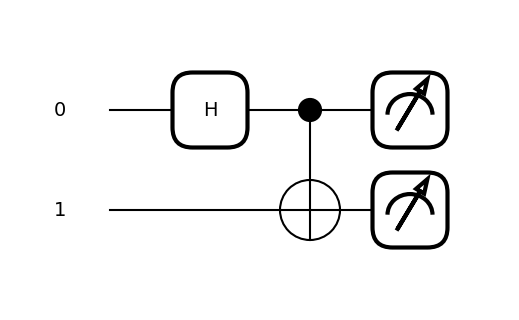

In [1]:
"""
Quantum Circuit Distribution Plotting
=====================================

This Jupyter notebook demonstrates how to generate and plot the distribution of measurement results
from a quantum circuit using PennyLane and Plotly. The quantum circuit used in this example is the
GHZ circuit, which consists of Hadamard gates and controlled-NOT (CNOT) gates.

The code will generate N=100 calls to the GHZ circuit and plot the distribution of the real part of
the state vector in real time. The distribution is visualized using a histogram plot.

Required Libraries:
- PennyLane (version 0.18.0 or above)
- Plotly (version 4.14.3 or above)
- tqdm (version 4.61.0 or above)
- time (built-in)

"""

import pennylane as qml
import plotly.graph_objects as go
from IPython.display import display
from tqdm import tqdm
import time

# Quantum circuit and device setup
wires = 2
dev = qml.device("default.qubit", wires=wires, shots=1000)

def Q_Plot(circuit):
    """
    Display the circuit diagram using PennyLane's draw functions.

    Args:
        circuit (qml.QNode): Quantum circuit to be displayed.
    """
    fig, ax = qml.draw_mpl(circuit, expansion_strategy='device')()
    print(qml.draw(circuit, expansion_strategy='device')())
    fig.show()

@qml.qnode(dev)
def ghz_circuit():
    """
    Definition of the GHZ circuit using PennyLane's quantum node decorator.

    Returns:
        array[float]: State vector resulting from the circuit.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])

    return qml.state()

# Initialize list to store results
all_results = []

# Create figure and histogram plot for the real part
fig_real = go.FigureWidget()
fig_real.add_bar(x=[f'Basis {i}' for i in range(2 ** wires)], y=[0] * (2 ** wires))
fig_real.update_layout(xaxis_title='Basis State', yaxis_title='Probability', title='Distribution of Real Part')

# Display the figure
display(fig_real)

# Generate N=100 calls to the quantum circuit and plot the distribution of the real part in real time
N = 100
for _ in tqdm(range(N)):
    result = ghz_circuit()
    all_results.append(result)

    # Separate the real part of the state vector and calculate the corresponding probabilities
    probs_real = abs(result.real) ** 2

    # Update the histogram plot with new data
    fig_real.data[0].y = probs_real

    # Update the plot layout
    fig_real.update_layout(title=f'Distribution of Real Part ({len(all_results)}/{N})')

    # Pause to allow for interactive plotting
    time.sleep(0.01)

# Display the circuit diagram
Q_Plot(ghz_circuit)
